### Student Information
Name: 白睿思 Aramis Alberto Palacios Aguirre

Student ID: 114065422

GitHub ID: 90473235

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. Data Source

In [98]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import sys
import helpers.data_mining_helpers as dmh
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
print(df.shape)
df.head(2)

(847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


### 2. Data Preparation

In [15]:
# Excersise 1

for i in range(3):
    print(f"SAMPLE {i+1}\n")
    print(df.text[i])
    print("\n")

SAMPLE 1

Calls on retards


SAMPLE 2

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


SAMPLE 3

Seeing lots of red in the ticker.




In [44]:
# In this case, we will use the whole dataset

### 3. Data Transformation

#### 3.1 Converting Dictionary into Pandas dataframe

In [ ]:
# Not necessary, because I used read_csv() function from pandas

#### 3.2 Familiarizing yourself with the Data

In [ ]:
# Excersise 2

# Querying the first and last columns where the 'type' is not 'comment'

df[df.columns[[0,-1]]][df['type'] != 'comment']

,type,label
3,post,1.0
48,post,0.0
63,post,0.0
70,post,0.0
72,post,0.0
...,...,...
783,post,0.0
786,post,0.0
802,post,0.0
836,post,0.0


In [ ]:
# Excesise 3

df[df['sentiment'] == 0].loc[::10, :].head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.0,['ticker'],0.0
24,comment,2025-04-11 11:37:41,mmjohl7,stocks,BREAKING: China raises tariffs on U.S. goods t...,applecokecake,https://www.reddit.com/r/stocks/comments/1jwku...,1,NaN,NaN,Shop like a billionaire.,0.0,0.0,0.0,"['billionaire', 'Shop']",0.0
50,comment,2021-07-29 14:27:50,h6yk0ll,stockstobuytoday,Technical Analysis Thread.,MayorOfDanktown,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,"Yup - money, money",0.0,0.0,0.0,['money'],0.0
81,comment,2025-04-11 17:19:41,mmlg1y2,wallstreetbets,Retardation is on the menu boys! WSB is so back,ManyCommunications,https://i.redd.it/0yq2ftren8ue1.jpeg,6,NaN,NaN,The cost of this was SPY going -20%. I’ll take...,0.0,0.0,0.0,"['cost', '%', 'emote|t5_2th52|8882', 'SPY', ']']",1.0
107,comment,2022-01-03 20:44:34,hr4chzn,stockstobuytoday,$GNPX stock of the day,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,![gif](giphy|3oz8xZGfHArTvh99YI),0.0,0.0,0.0,"[']', 'gif', 'giphy|3oz8xZGfHArTvh99YI', '[']",0.0


### 4. Data Mining using Pandas

#### 4.1 Dealing with Missing Values

In [ ]:
# Checking the missing values per column

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [ ]:
# Excersise 4

# Checking the missing values per row

df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [29]:
# Excercise 5

# Not necessary, since it's a demostrative excercise for the "Master" notebook

#### Action

In [45]:
df.downvotes.unique()

array([nan,  0.,  4., 11.,  1.])

In [46]:
df.upvote_ratio.unique()

array([ nan, 0.98, 1.  , 0.95, 0.92, 0.91, 0.99, 0.93, 0.5 , 0.84])

In [50]:
df[~df.upvote_ratio.isnull()]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
48,post,2025-04-02 13:00:42,1jpnz8b,stockstobuytoday,Earnings for current week,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
72,post,2025-04-04 6:25:04,1jr5ag5,stockstobuytoday,Spending first $250 tmmw on stocks,Alarmed_Champion_913,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"A lot of stocks are down right now, and I'm th...",0.347959,0.005102,1.0,"['cuz', 'OPTT', 'BLGO', 'im', 'money', 'idea',...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,post,2025-03-31 13:54:38,1jo3qsz,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
786,post,2025-04-03 12:30:39,1jqh5xb,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
802,post,2025-04-02 13:54:36,1jpp50o,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,Gappers for today\r\n\r\n [Gappers (stockbuyve...,0.000000,0.000000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0
836,post,2025-03-26 12:18:30,1jkadvn,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,how does the futures market look today\r\n\r\n...,0.377083,0.062500,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0


In [ ]:
# Given that we have two columns with missing values ("downvotes" and "upvote_ratio"), one would think to drop the missing values. However, since the column "upvotes"
# has no missing values and those 3 columns are related, we can fill the missing values of "downvotes" with 0 (assuming a null value is equal to 0 for the "downvotes" field), 
# as well as fill the missing values of "upvote_ratio" with a formula ("upvotes" / ("upvotes" + "downvotes")). This might be useful for visualizations in the future.

In [60]:
df = df.fillna({'downvotes': 0})
df['upvote_ratio'] = np.where((df['upvotes'] + df['downvotes']) == 0, 0, df['upvotes'] / (df['upvotes'] + df['downvotes']))
df.head(2)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,0.0,0.0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,0.0,1.0,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0


In [59]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.2 Dealing with Duplicate Data

In [ ]:
# Not excersises in this section

In [ ]:
# We don't have duplicated rows

df[df.duplicated()]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label


### 5. Data Preprocessing

#### 5.1 Sampling

In [73]:
# Excersise 6

# Changes noticed:
# 1. df_sample is a random sample of 100 rows taken from the original dataframe df, so it has less rows as the original.
# 2. The sample is taken randomly, so the records in df_sample are not necessarily the first 100 records of X.
# 3. The indexes of the rows in df_sample are also different from those in X, since they are taken randomly and have not been reset.

df_sample = df.sample(n=300)

print(df.head()[["text", "sentiment"]])
print('-----')
print(df_sample.head()[["text", "sentiment"]])

                                                text  sentiment
0                                   Calls on retards       -1.0
1  Stunt as in like why did they even make a big ...        1.0
2                  Seeing lots of red in the ticker.        0.0
3  Vision Marine Technologies Inc. is rewriting t...        1.0
4                           He didn’t say thank you.        0.0
-----
                                                  text  sentiment
730  A prefect time to start divesting into more in...        0.0
97   Trump surrounded himself with people telling h...       -1.0
66   The funny part is that Elmo has called Navarro...       -1.0
411  Literally cannot think of a reason to buy any ...       -1.0
339                                      It is Aladeen        0.0


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

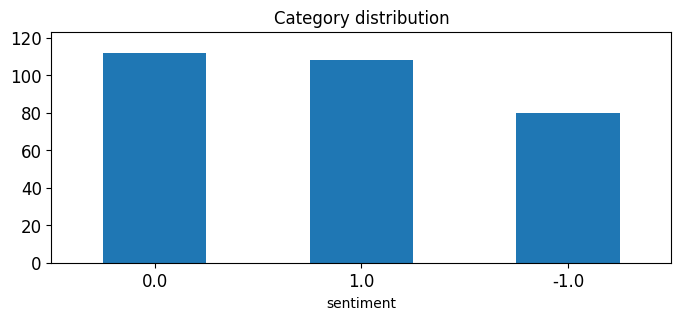

In [74]:
# Excersise 7

df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, df_sample.value_counts('sentiment').max() * 1.10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Sentiment distribution'}>

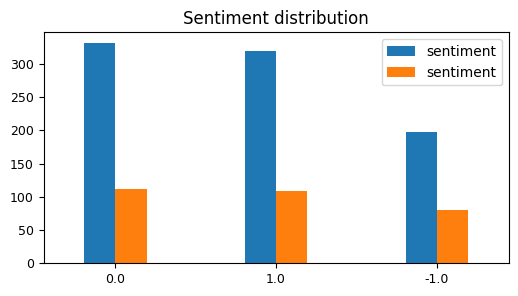

In [75]:
# Excersise 8

# Here's a similar distribution comparisson between the original dataset df and the sample df_sample

value_counts_df = df.value_counts('sentiment')
value_counts_df_sample = df_sample.value_counts('sentiment')

counts = pd.concat([value_counts_df, value_counts_df_sample], axis=1)
counts.columns = ['sentiment', 'sentiment']
counts.plot(
    kind='bar', 
    title='Sentiment distribution',
    rot=0, 
    fontsize=9,
    width=0.39,
    figsize=(6,3),
    xlabel='')

In [ ]:
# As we can infer, not all columns in the dataset are useful for text mining purposes. For example, "post_id", "author" and "url" so we'll get rid of them. 
# In this case, it may not be necessary because the dataset is not too big, but in larger datasets it would be a good practice to drop useless columns.

In [84]:
df = df.drop(columns=['post_id', 'author', 'url'])

#### 5.2 Feature Creation

In [ ]:
# No excersise in this section

In [105]:
# Tokenizing text data

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

#### 5.3 Feature Subset Selection

In [106]:
# Excersise 9

# Note that I'm adding the stop_words='english' and lowercase=True arguments in order to get a cleaner tokenization with no stopwords and with no case sensitivity.

count_vect = CountVectorizer(stop_words='english', lowercase=True)
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(646))	1
  (np.int32(0), np.int32(3087))	1


In [107]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['craving', 'hawaiian', 'pizza', 'right']

In [108]:
analyze(df['text'][0])

['calls', 'retards']

In [110]:
df_counts[0:5, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [112]:
# Excersise 10

# As we can see above, the term-document matrix is huge and sparse and we only have a few cases where they show different values than 0. I'll do the excersise based on the 4th record.
# The fourth record has 4 non-zero values.

fourth_record = df_counts[3, :200].toarray()
print(count_vect.get_feature_names_out()[[i for i in range(len(fourth_record[0])) if fourth_record[0][i] > 0]])

['116' 'achieved' 'achievement' 'achieves']


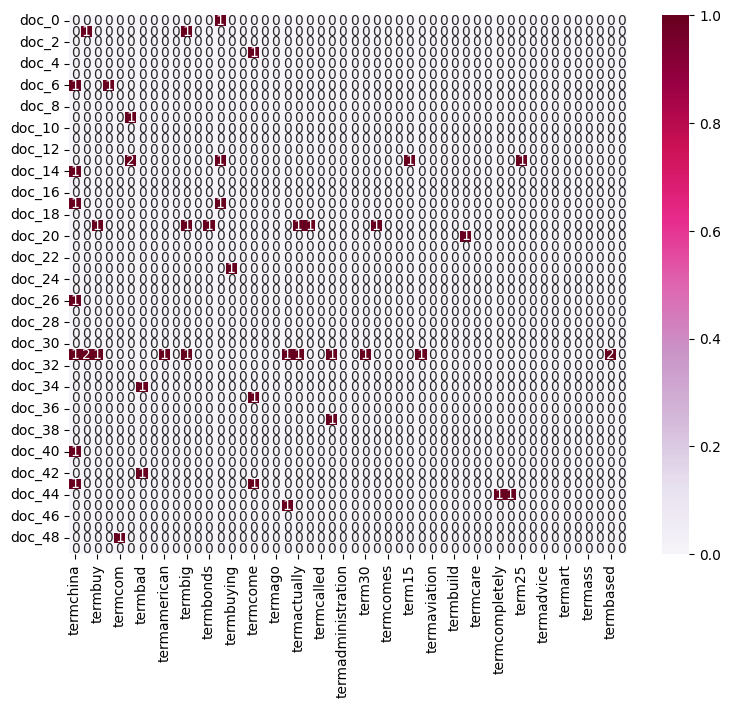

In [ ]:
# Excersise 11

# To achieve a better visualization, we first calculate the term frequencies by summing up the columns of the document-term matrix df_counts.
# Then we sort the terms based on their frequencies and select the top N most frequent terms (user can vary the N most frequent terms).
# Finally, we create a heatmap using these top N terms across the first M documents.
# With this we can see the distribution of the most common terms across multiple documents with the heatmap showing more color on the left.
# We can also see that the most common term across all documents is "termchina"

n_terms = 50
m_documents = 50

term_freq = list(zip(range(df_counts.shape[0]), df_counts.toarray().sum(axis=0).tolist()))
sorted_term_freq = sorted(term_freq, key=lambda x: x[1], reverse=True)
top_n_terms = [t[0] for t in sorted_term_freq[:n_terms]]

plot_x = ['term' + count_vect.get_feature_names_out()[i] for i in top_n_terms]
plot_y = ["doc_" + str(i) for i in list(df.index)[:m_documents]]
plot_z = df_counts[:m_documents, top_n_terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 5.4 Atrribute Transformation / Aggregation

##### 5.4.1 Transform Text Data

In [115]:
# Excersise 12

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
df_terms = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:300],
    "Frequency": term_frequencies[:300]
})

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"First 300 Term Frequencies (by alphabetical order)",)
fig.update_layout(xaxis=dict(tickangle=-90))
fig.show()

In [116]:
# Excersise 13

# In this case, we just add a variable to set the number of terms to visualize. It's more efficient because you only need to change
# one variable.

import plotly.express as px

n_terms = 50

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
df_terms = pd.DataFrame({
    "Term": count_vect.get_feature_names_out()[:n_terms],
    "Frequency": term_frequencies[:n_terms]
})

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"First {n_terms} Term Frequencies (by alphabetical order)")
fig.update_layout(xaxis=dict(tickangle=-90))
fig.show()

In [117]:
# Excersise 14

# In this case, we use previously created code to sort the terms efficiently. Since the sorting has been optimized, it's
# only necessary to change the top_n_terms variable

term_freq = list(zip(range(df_counts.shape[0]), count_vect.get_feature_names_out(), df_counts.toarray().sum(axis=0).tolist()))
sorted_term_freq = sorted(term_freq, key=lambda x: x[2], reverse=True)

top_n_terms = 50

df_terms = pd.DataFrame(sorted_term_freq[:top_n_terms], columns=['Index', 'Term', 'Frequency'])

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"Top {top_n_terms} Most Frequent Terms",
    hover_data=["Index"],
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()

In [118]:
# Excersise 15

# In this case, we use the code from the previous excersise, but we apply a logarithmic scale to the frequencies.
# When we use regular term frequency to plot, we can see that the first few terms have a very high frequency compared to the rest
# and tend to dominate the graph. This doesn't happen when we change to log distribution.
# The change in the Y-axis and the curvature of the distribution also indicates that now the plot highlights those words with
# medium-frequency, which can be more meaningful than those with very high frequency. Given a large vocabulary, those
# medium-frequency words can provide more insights into the text data.

import math

term_freq = list(zip(range(df_counts.shape[0]), count_vect.get_feature_names_out(), df_counts.toarray().sum(axis=0).tolist()))
sorted_term_freq = sorted(term_freq, key=lambda x: x[2], reverse=True)
sorted_term_freq = [(i[0], i[1], math.log(i[2])) for i in sorted_term_freq]

top_n_terms = 300

df_terms = pd.DataFrame(sorted_term_freq[:top_n_terms], columns=['Index', 'Term', 'Frequency'])

fig = px.bar(
    df_terms,
    x="Term", y="Frequency",
    title=f"Top {top_n_terms} Most Frequent Terms",
    hover_data=["Index"],
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here